In [1]:
# lib
import sys
sys.path.append('..')

# set cwd one up
import os
os.chdir('..')

In [2]:
from torch import device, set_default_dtype, float64
from torch.cuda import is_available, get_device_name, memory_allocated, memory_reserved

# find gpu if available, and name
device = device("cuda" if is_available() else "cpu")
device = "cpu"
print(device)
set_default_dtype(float64)

# show device info
if is_available():
    print(get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(memory_reserved(0)/1024**3,1), 'GB')

cpu


Loaded data with 12 cells and 4 background noise models
Plots: on


Fitting background noise...
Background noise model:
Standard deviation: 11.553871266552218

Detrending and denoising cell data...
According to ELBO, there are 1 oscillating cells


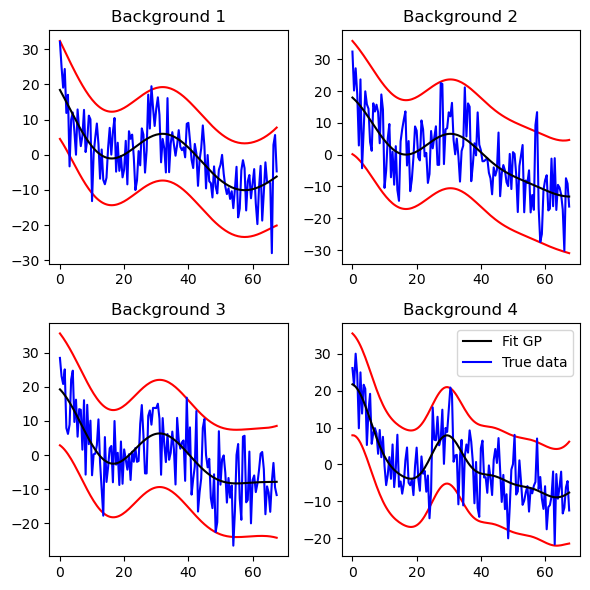

In [3]:
from pyrocell.core import OscillatorDetector

path = "data/hes/Hes1_example.csv"
osc = OscillatorDetector(path)

params = {
    "verbose": True,
    "plots": ["background"],
    "jitter": 1.0e-4,
}
osc.fit_models(**params)

In [5]:
print(osc.OU_elbos)
print(osc.OUosc_elbos)

[tensor(25.1210), tensor(-18.5980), tensor(31.0927), tensor(47.4302), tensor(50.7486), tensor(44.1346), tensor(261.5003), tensor(4.3002), tensor(25.8125), tensor(73.8295), tensor(14.0842), tensor(18.4123)]
[tensor(5.5779), tensor(-43.2026), tensor(25.3392), tensor(35.3481), tensor(46.8360), tensor(35.4180), tensor(52.6044), tensor(-12.5193), tensor(20.5228), tensor(84.9196), tensor(0.2688), tensor(0.0671)]


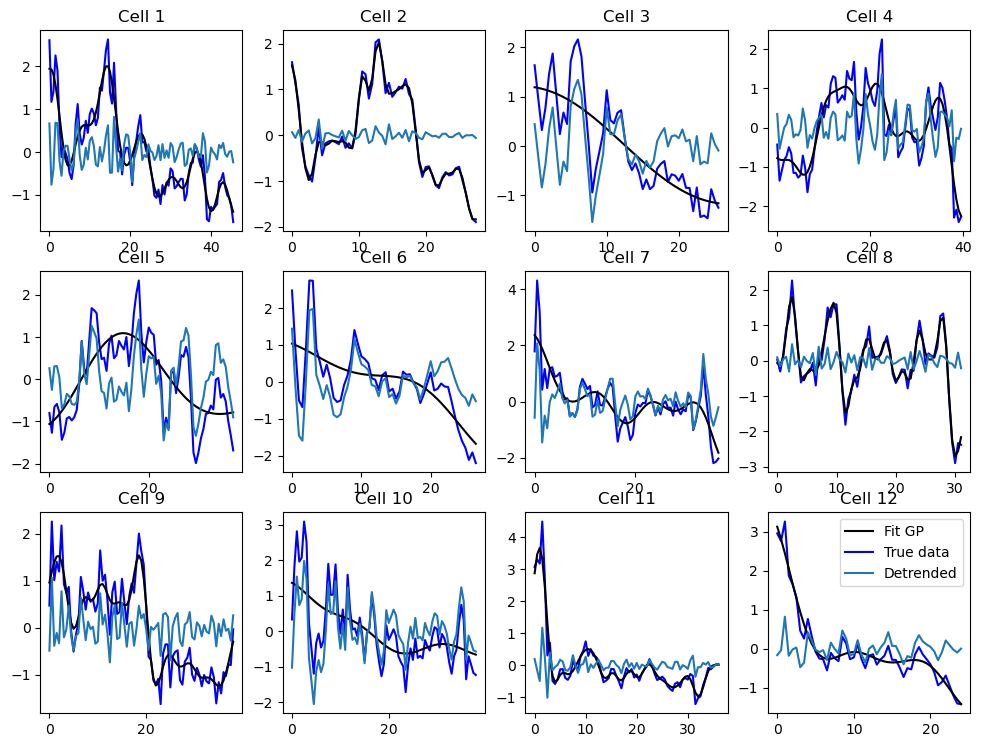

In [4]:
osc.plot("detrend")